# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

### PHS input spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 7866.0 seconds with an integrated measurement of 0.065902847.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

# Simulated using Meulders spectrum as input at tgt location
simMeuldersPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o'
check_path(simMeuldersPath)
print "\n"

(meuldersTally, meuldersTot, meuldersUcert) = read_tally(simMeuldersPath, 214, readGroups=True, splitTally=False)

# Simulated using unfolded PHS as input at tgt location
print "PHS Input"
simPhsPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil_phs.o'
check_path(simPhsPath)

(phsTally, phsTot, phsUcert) = read_tally(simPhsPath, 214, readGroups=True, splitTally=False)

stayslFlux(phsTally, maxBinAdjust=25, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o


PHS Input
The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil_phs.o
The flux:
 5.0000e-09 7.6267e-10 3.7340e-09 7.8840e-09 5.8917e-09 4.1760e-09 3.3673e-09 
 1.2893e-09 9.6155e-10 9.0249e-10 8.1315e-10 1.1971e-09 7.0350e-10 7.2572e-10 
 1.3227e-09 1.2361e-09 1.0907e-09 1.7283e-09 2.0639e-09 1.5420e-09 1.3732e-09 
 2.7529e-09 2.2594e-09 1.7561e-09 7.8203e-10 8.2227e-10 1.6886e-09 9.3965e-10 
 1.4958e-09 1.6028e-09 2.5952e-09 1.7236e-09 3.5038e-09 3.2376e-09 3.4122e-09 
 6.4389e-09 6.8711e-09 1.0840e-08 9.7369e-09 1.4875e-08 1.4377e-08 2.4412e-08 
 3.5960e-08 3.9389e-08 6.6281e-08 5.8889e-08 7.3332e-08 1.0651e-07 1.2485e-07 
 2.0673e-07 2.0136e-07 2.3450e-07 2.4630e-07 2.9599e-07 2.9685e-07 3.4934e-07 
 3.4241e-07 2.8183e-07 4.0613e-07 3.9296e-07 5.0036e-07 4.9080

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [5]:
import pandas as pd
from DataAnalysis.DataManipulation import bin_integration, bin_differentiation

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)

df['adjFlux'] = bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low')
df['adjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low', True)
df['unadjFlux'] = bin_integration(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low')
df['unadjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low', True)

df['adjLethargyStd'] = df['adjStd'] * df['adjLethargy'] / 100
df['unadjLethargyStd'] = df['unadjStd'] * df['adjLethargy'] / 100
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert,adjLethargy,unadjLethargy,adjLethargyStd,unadjLethargyStd
1,1.000000e-10,72.438300,20.300400,3.568,14.400734,20.300400,0.199,348210.0000,0.59,31.459554,8.816352,6.254159,31.459554
2,1.000000e-09,6.321960,3.096450,2.042,0.287649,0.789904,0.178,348130.0000,0.59,2.745592,1.344771,0.124924,0.700401
3,1.000000e-08,29.357900,15.160600,1.937,1.080371,2.546981,0.219,348130.0000,0.59,35.247423,18.201986,1.297105,5.921567
4,2.300000e-08,63.990000,32.008500,1.999,2.655585,4.593220,0.289,348100.0000,0.59,82.405187,41.219978,3.419815,11.825144
5,5.000000e-08,45.315400,23.920260,1.894,1.799021,2.583388,0.367,348040.0000,0.59,108.226132,57.128420,4.296577,11.688422
6,7.600000e-08,38.565150,16.954470,2.275,2.379470,2.354976,0.444,347990.0000,0.59,93.107829,40.933171,5.744753,12.932677
7,1.150000e-07,45.842500,13.671350,3.353,5.725728,3.297530,0.518,347950.0000,0.59,117.284348,34.977049,14.648815,28.288985
8,1.700000e-07,16.766250,5.234555,3.203,2.129314,1.131711,0.588,347910.0000,0.59,41.350660,12.910001,5.251534,8.940013
9,2.550000e-07,14.363750,3.903875,3.679,2.460510,1.022815,0.654,347890.0000,0.59,36.007702,9.786412,6.168119,9.434018
10,3.800000e-07,17.136000,3.664180,4.677,4.553035,1.360144,0.716,347870.0000,0.59,46.345200,9.909965,12.313920,17.203338


Convert to Histograms and plot the adjusted and unadjusted flux.

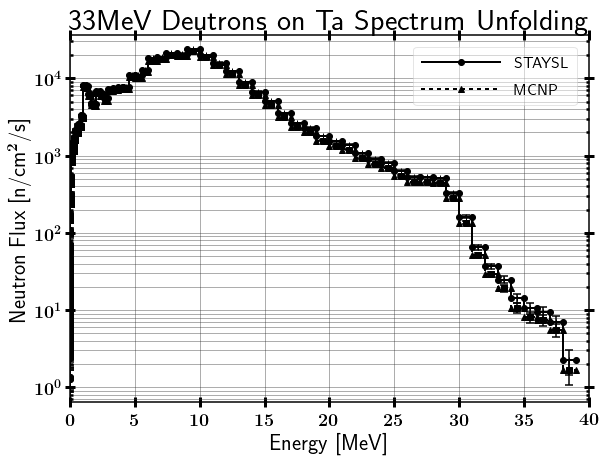

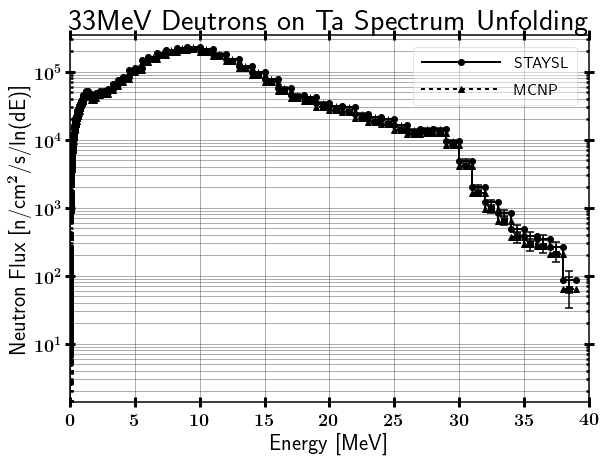

In [6]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/'

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjHisto = Histogram()
unadjHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjHisto.plot(unadjHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]')

adjLethargyHisto = Histogram()
adjLethargyHisto.build_histo(df['lowE'].tolist(), df['adjLethargy'].tolist(), uncert=df['adjLethargyStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjLethargyHisto = Histogram()
unadjLethargyHisto.build_histo(df['lowE'].tolist(), df['unadjLethargy'].tolist(), uncert=df['unadjLethargyStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')

#ratioHisto = Histogram()
#ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
#ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP',
#              xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

Create MCNP Histograms

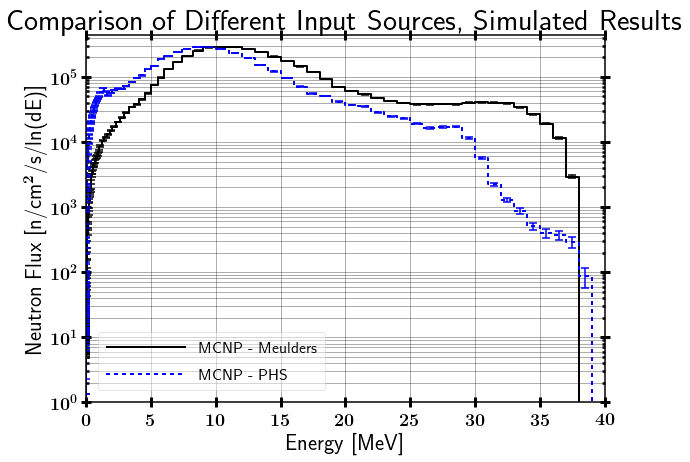

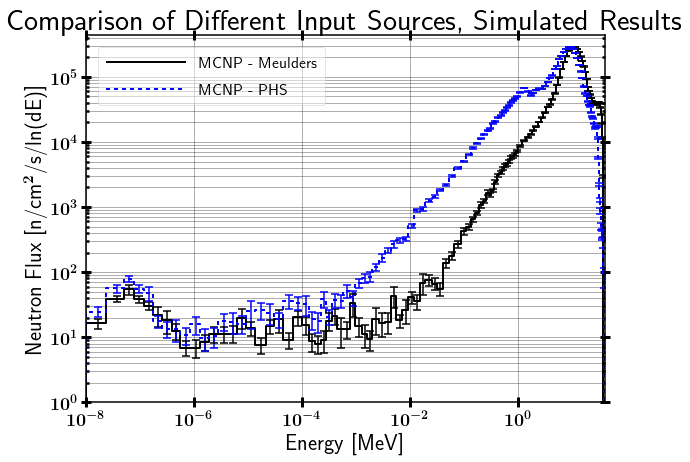

In [8]:
normFactor = 4.13E+9  # From Meulders based calcs which ignore flux below 3 MeV.

# Meulders input source
meuldersTally['normTally'] = meuldersTally['tally'] * normFactor
meuldersTally['normUncertainty'] = meuldersTally['uncertainty'] * meuldersTally['normTally']
meuldersHisto = Histogram()
meuldersHisto.build_histo(meuldersTally['bin'].tolist(), meuldersTally['normTally'].tolist(), 
                       uncert=meuldersTally['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - Meulders')

meuldersTally['normLethargy'] =  bin_differentiation(meuldersTally['bin'].tolist(), meuldersTally['normTally'].tolist(),
                                                     'up', True)
meuldersTally['normLethargyUncert'] = meuldersTally['uncertainty'] * meuldersTally['normLethargy']
meuldersLethargyHisto = Histogram()
meuldersLethargyHisto.build_histo(meuldersTally['bin'].tolist(), meuldersTally['normLethargy'].tolist(), 
                       uncert=meuldersTally['normLethargyUncert'].tolist(), edgeLoc='up', name='MCNP - Meulders')

# PHS input source
phsNormFactor = 4.13E+9 *4.426/3.294
phsTally['normTally'] = phsTally['tally'] * phsNormFactor
phsTally['normUncertainty'] = phsTally['uncertainty'] * phsTally['normTally']
phsHisto = Histogram()
phsHisto.build_histo(phsTally['bin'].tolist(), phsTally['normTally'].tolist(), 
                     uncert=phsTally['normUncertainty'].tolist(), edgeLoc='up', name='MCNP - PHS')

phsTally['normLethargy'] =  bin_differentiation(phsTally['bin'].tolist(), phsTally['normTally'].tolist(),
                                                'up', True)
phsTally['normLethargyUncert'] = phsTally['uncertainty'] * phsTally['normLethargy']
phsLethargyHisto = Histogram()
phsLethargyHisto.build_histo(phsTally['bin'].tolist(), phsTally['normLethargy'].tolist(), 
                             uncert=phsTally['normLethargyUncert'].tolist(), edgeLoc='up', name='MCNP - PHS')

# Plot and compare  @ target
meuldersLethargyHisto.plot(phsLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, 
                           includeMarkers=False, legendLoc=3, color=['k','b'], 
                           title='Comparison of Different Input Sources, Simulated Results',
                           xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                           savePath=outpath+'33MeVTa_MCNP-Input-Comp_semilog')

# Plot and compare 2 @ target
meuldersLethargyHisto.plot(phsLethargyHisto, xMin=1E-8, xMax=40, yMin=1, logX=True, logY=True, 
                           includeMarkers=False, legendLoc=2, color=['k','b'], 
                           title='Comparison of Different Input Sources, Simulated Results',
                           xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                           savePath=outpath+'33MeVTa_MCNP-Input-Comp_log')

## PHS

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [11]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 0.61302, Std Norm = 0.855480619301
Chi^2 = 0.60418
Std Norm = 0.850603873727, 0.853017602398


MCNP Beam Flux = 4.426504e+05 n/cm^2/s
STAYSL Beam Flux = 4.800363e+05 n/cm^2/s
Sim to Experimental Reduced Chi^2 = 4224.77306486


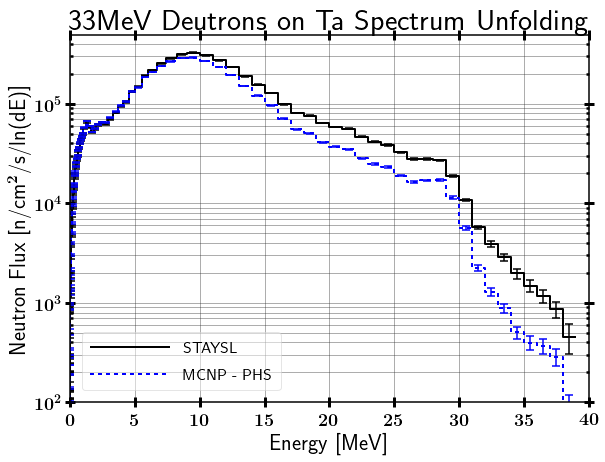

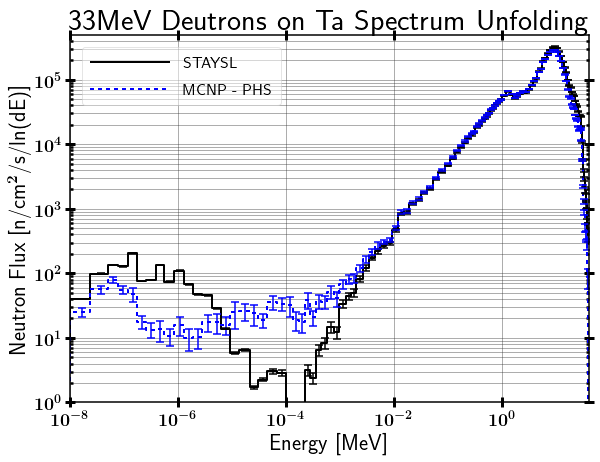

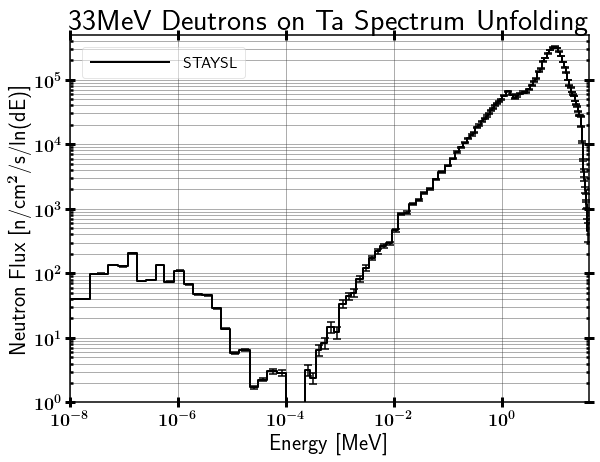

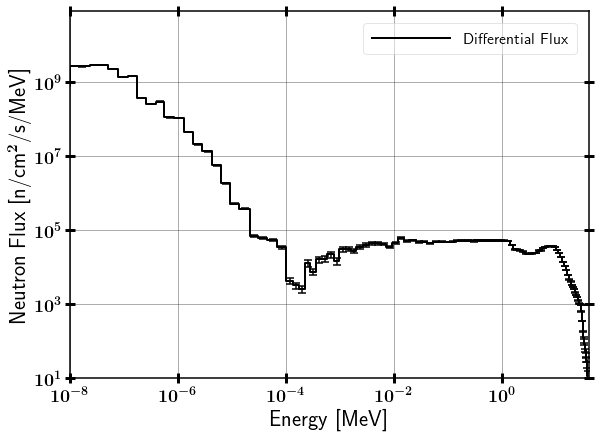

In [10]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['adjLethargy'].tolist(),
                               uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                               edgeLoc='low', name='STAYSL')

iterDiff=Histogram()
iterDiff.build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjDiff'].tolist(),
                     uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjDiff']).tolist(),
                     edgeLoc='low', name='Differential Flux')

print "MCNP Beam Flux = {:2e} n/cm^2/s".format(sum(phsTally['normTally']))
print "STAYSL Beam Flux = {:2e} n/cm^2/s".format(sum(iterSoln[iter]._df['adjFlux']))

from DataAnalysis.Stats import red_chisq
print "Sim to Experimental Reduced Chi^2 = {}".format(red_chisq(iterAdjHisto[iter].midPtData, 
                                                      phsHisto.midPtData[:len(iterAdjHisto[iter].midPtData)], 
                                                      standDev=iterAdjHisto[iter].sigma , freeParams=1))

iterAdjHisto[iter].plot(phsLethargyHisto, xMin=1E-6, xMax=40, yMin=100, logX=False, logY=True, includeMarkers=False,
                        legendLoc=3, color=['k','b'], title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_Comp_semilog'.format(iter))


iterAdjHisto[iter].plot(phsLethargyHisto, xMin=1E-8, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
                        legendLoc=2, color=['k','b'], title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_Comp_log'.format(iter))

iterAdjHisto[iter].plot(xMin=1E-8, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
                        legendLoc=2, title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_Lethargy_log'.format(iter))

iterDiff.plot(xMin=1E-8, xMax=40, yMin=10, logX=True, logY=True, includeMarkers=False,
              includeLegend=False, 
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/MeV]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_Diff_log'.format(iter))


#### Create MCNP Input Source

Using this unfold, create the MCNP input source spectrum.

In [25]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())

print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

### Iterative Solution #2:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [12]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=1))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 1
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam-PHS/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 0.78166, Std Norm = 5.00554668143
Chi^2 = 9.50947
Chi^2 = 6.56003
Chi^2 = 5.61616
Std Norm = 4.86077435703, 4.88581628901


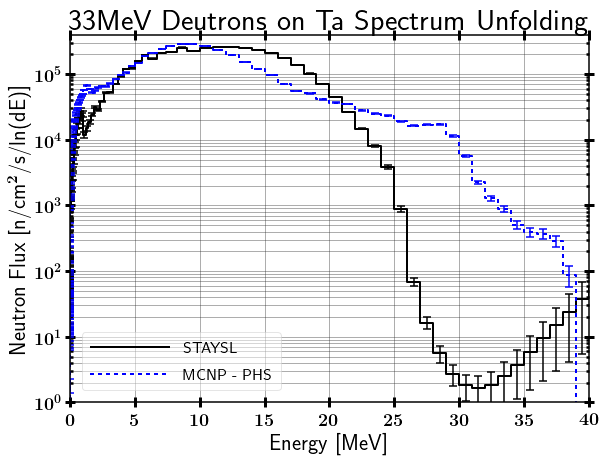

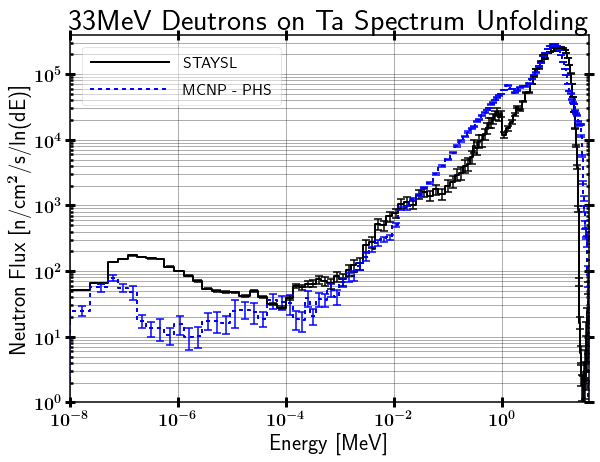

In [13]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(phsLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
                        legendLoc=3, color=['k','b'], title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_semilog'.format(iter))

iterAdjHisto[iter].plot(phsLethargyHisto, xMin=1E-8, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
                        legendLoc=2, color=['k','b'], title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_log_Itr{:1d}_log'.format(iter))